In [1]:
import jieba
# 全模式
s = "小明硕士毕业于中国科学院计算所"
seg_list = jieba.cut(s,cut_all=True)
print("/".join(seg_list))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\hp\AppData\Local\Temp\jieba.cache
Loading model cost 0.640 seconds.
Prefix dict has been built succesfully.


小/明/硕士/毕业/于/中国/中国科学院/科学/科学院/学院/计算/计算所


In [16]:
# 精确模式（默认）
seg_list = jieba.cut(s)
print("/".join(seg_list))

小明/硕士/毕业/于/中国科学院/计算所


In [17]:
# 搜索引擎模式
seg_list = jieba.cut_for_search(s)
print("/".join(seg_list))

小明/硕士/毕业/于/中国/科学/学院/科学院/中国科学院/计算/计算所


In [2]:
import jieba
s = "台中在正确情况下不会被切开"
seg_list = jieba.cut(s)
print("/".join(seg_list))

台中/在/正确/情况/下/不会/被/切开


In [3]:
seg_list = jieba.cut(s,HMM = False)
print("/".join(seg_list = jieba.cut(s)))

台/中/在/正确/情况/下/不会/被/切开


In [4]:
jieba.suggest_freq('台中',True)
seg_list = jieba.cut(s,HMM = False)
print("/".join(seg_list))

台中/在/正确/情况/下/不会/被/切开


In [5]:
s = "把message放入post中将出错"
seg_list = jieba.cut(s)
print("/".join(seg_list))

把/message/放入/post/中将/出错


In [9]:
jieba.suggest_freq(('中','将'),True)
seg_list = jieba.cut(s)
print("/".join(seg_list))

把/message/放入/post/中/将/出错


In [14]:
import jieba
s = "凯特琳最近在研究石墨烯的特性;自定义词功能真的很有用"
print("/".join(jieba.cut(s)))

凯特/琳/最近/在/研究/石墨/烯/的/特性/;/自定义词/功能/真的/很/有用


In [15]:
jieba.add_word('石墨烯')
jieba.add_word('凯特琳')
jieba.del_word('自定义词')
print("/".join(jieba.cut(s)))

凯特琳/最近/在/研究/石墨烯/的/特性/;/自定义/词/功能/真的/很/有用


In [39]:
import jieba
import jieba.posseg as psg

words = psg.cut("我一把把把把住了")
for word, flag in words:
    print("%s %s" % (word, flag))

我 r
一把 m
把 p
把 p
把住 v
了 ul


In [2]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


KeyboardInterrupt: 

In [1]:
from __future__ import division
import nltk
import matplotlib
from nltk.book import *
from nltk.util import bigrams

print('单词搜索')
text1.concordance('boy')
text2.concordance('friends')

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811


LookupError: 
**********************************************************************
  Resource [93mgenesis[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('genesis')
  [0m
  Attempted to load [93mcorpora/genesis[0m

  Searched in:
    - 'C:\\Users\\hp/nltk_data'
    - 'g:\\python35\\nltk_data'
    - 'g:\\python35\\share\\nltk_data'
    - 'g:\\python35\\lib\\nltk_data'
    - 'C:\\Users\\hp\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [9]:
from nltk.tokenize import word_tokenize
text = """Hello Mr. Smith, how are you doing today? 
The weather is great, and Python is awesome. 
The sky is pinkish-blue. You shouldn't eat cardboard."""
token_list = word_tokenize(text)
print(token_list)

['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'Python', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard', '.']


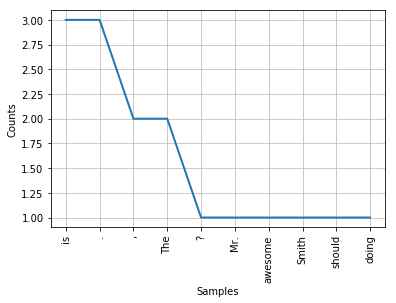

     is       .       ,     The       ?     Mr. awesome   Smith  should   doing 
      3       3       2       2       1       1       1       1       1       1 


[('is', 3),
 ('.', 3),
 (',', 2),
 ('The', 2),
 ('?', 1),
 ('Mr.', 1),
 ('awesome', 1),
 ('Smith', 1),
 ('should', 1),
 ('doing', 1)]

In [25]:
import nltk
from nltk.tokenize import word_tokenize

text = """Hello Mr. Smith, how are you doing today? 
The weather is great, and Python is awesome. 
The sky is pinkish-blue. You shouldn't eat cardboard."""
token_list = word_tokenize(text)
freq = nltk.FreqDist(token_list)

# for key,val in freq.items():
#     print(str(key) + ':' + str(val))
    


In [32]:
# freq为上面的FreqDist对象
# most_common()传入一个整数n，返回出现次数最多的前n项组成的列表
print(freq.most_common(10))

[('is', 3), ('.', 3), (',', 2), ('The', 2), ('?', 1), ('Mr.', 1), ('awesome', 1), ('Smith', 1), ('should', 1), ('doing', 1)]


In [30]:
# tabulate()传入一个整数n，以表格的形式打印出现次数最多的前n项
freq.tabulate(10)

     is       .       ,     The       ?     Mr. awesome   Smith  should   doing 
      3       3       2       2       1       1       1       1       1       1 


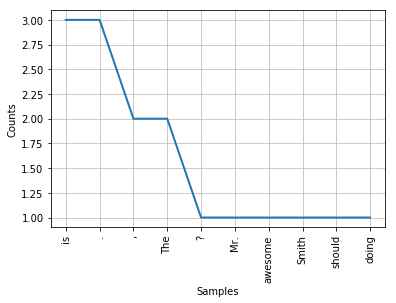

In [31]:
# plot()传入一个整数n，绘制出现次数最多前n项的折线图
freq.plot(10)

In [17]:
import nltk
from nltk.stem import WordNetLemmatizer

#wnl = WordNetLemmatizer()
wnl = nltk.stem.WordNetLemmatizer()
raw = "Two planes took off at six."
tokens = word_tokenize(raw)
res=  [wnl.lemmatize(t) for t in tokens]
print(res)

print(wnl.lemmatize('planes','v'))
print(wnl.lemmatize('took','v'))

['Two', 'plane', 'took', 'off', 'at', 'six', '.']
plan
take


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [16]:
import nltk
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize

ss = SnowballStemmer('english')
text = """
It is important to by very pythonly while you are pythoning with python. 
All pythoners have pythoned poorly at least once.
"""
tokens = word_tokenize(text)
res=  [ss.stem(t) for t in tokens]
print(res)

['it', 'is', 'import', 'to', 'by', 'veri', 'python', 'while', 'you', 'are', 'python', 'with', 'python', '.', 'all', 'python', 'have', 'python', 'poor', 'at', 'least', 'onc', '.']


In [40]:
import nltk
from nltk.tokenize import word_tokenize
raw = "Steven Paul Jobs was an American business magnate."
tokens = nltk.word_tokenize(raw)
tags = nltk.pos_tag(tokens)

In [41]:
ners = nltk.ne_chunk(tags)
print(ners)

(S
  (PERSON Steven/NNP)
  (PERSON Paul/NNP Jobs/NNP)
  was/VBD
  an/DT
  (GPE American/JJ)
  business/NN
  magnate/NN
  ./.)


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker.zip.


True

In [33]:
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


True